In [2]:
path='/content/drive/MyDrive'

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import sklearn.linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm


## Step 1 - Read the data from  CSV file

In [4]:
df_raw =  pd.read_csv(path+'/day.csv')

In [5]:
df_raw.shape

(730, 16)

In [6]:
df_raw.head(2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801


In [15]:
df_raw.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [16]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## Casual and Registered columns  sum up to CNT value, hence these columns are dropped

## Checking for any null value in the data set

In [7]:
df_raw.isnull().mean()


instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

## seggreate Numberical and Categorical Columns
num_cols = []
cat_cols = []

In [7]:
###. 'instant', 'dteday', 'temp'  are dropped as they are the date on which the activity was recorded

num_cols = [  'atemp', 'hum', 'windspeed', 'cnt']
cat_cols = [ 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit']


In [8]:
df_raw[num_cols].describe()

,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000
mean,23.726322,62.765175,12.763620,4508.006849
std,8.150308,14.237589,5.195841,1936.011647
min,3.953480,0.000000,1.500244,22.000000
25%,16.889713,52.000000,9.041650,3169.750000
50%,24.368225,62.625000,12.125325,4548.500000
75%,30.445775,72.989575,15.625589,5966.000000
max,42.044800,97.250000,34.000021,8714.000000


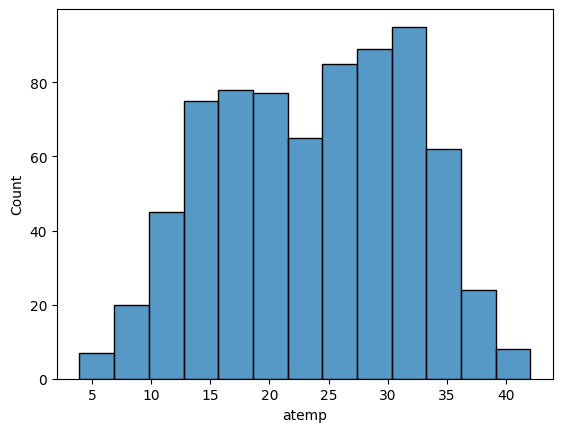

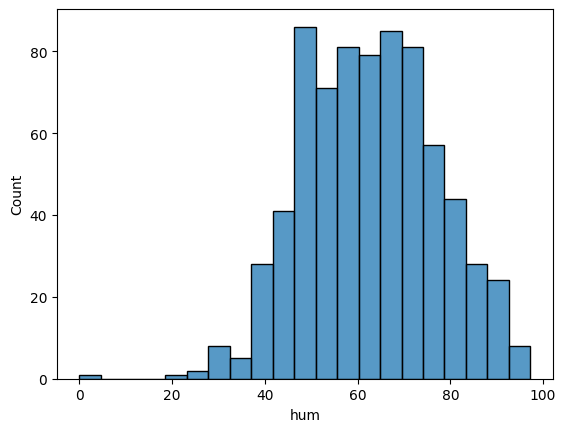

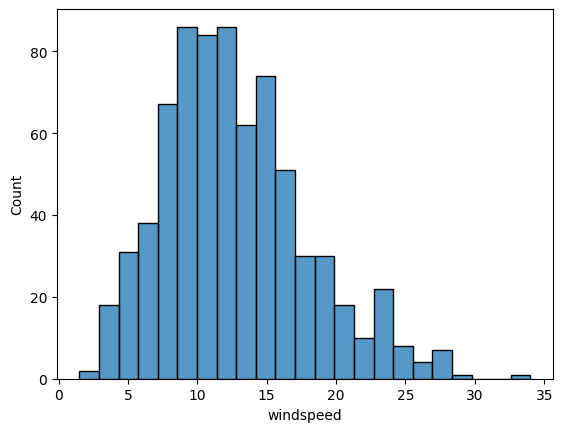

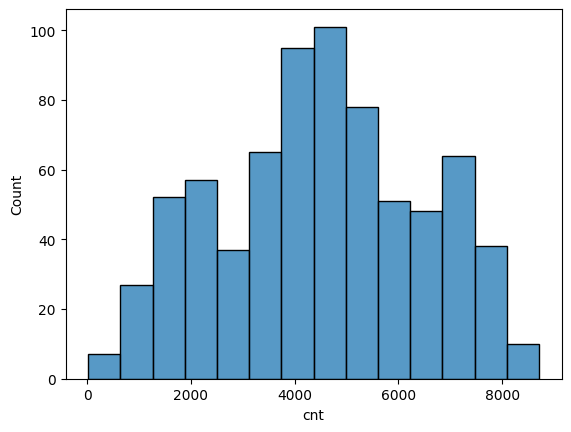

In [9]:
for i in num_cols:
  sns.histplot(x=df_raw[i])
  plt.show()

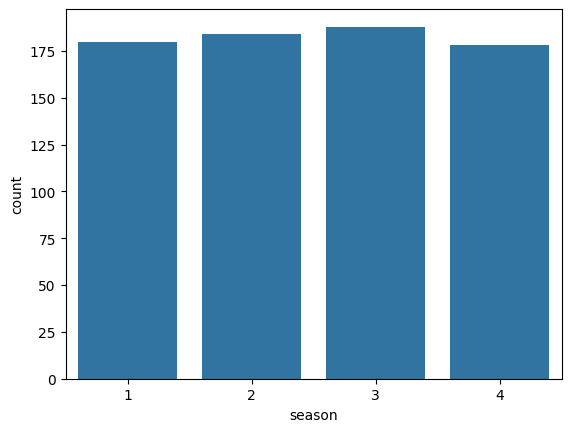

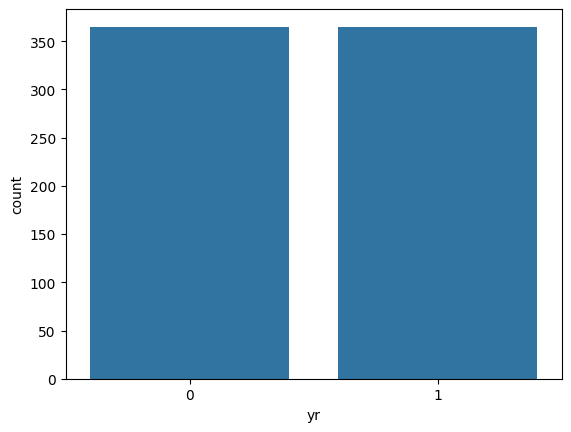

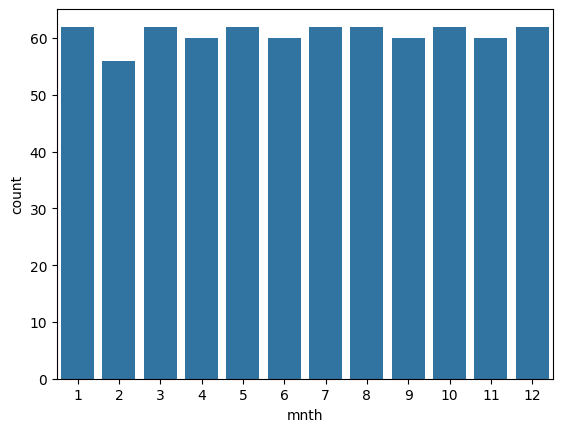

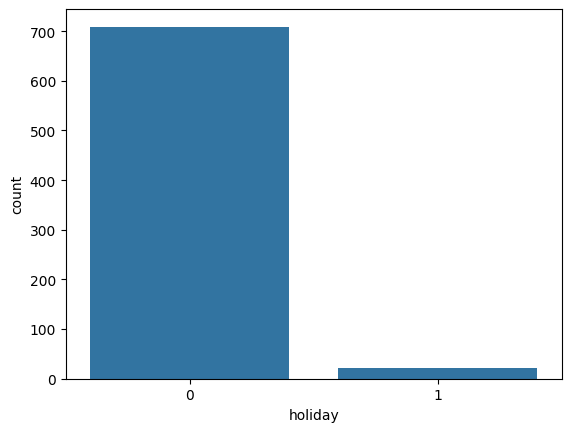

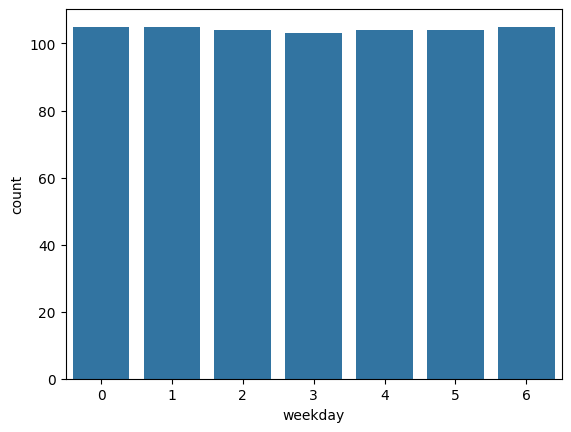

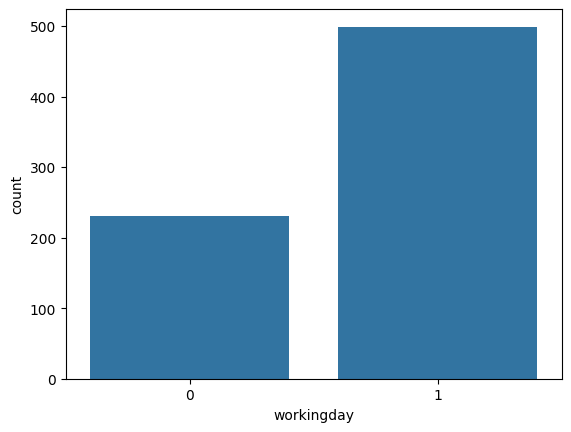

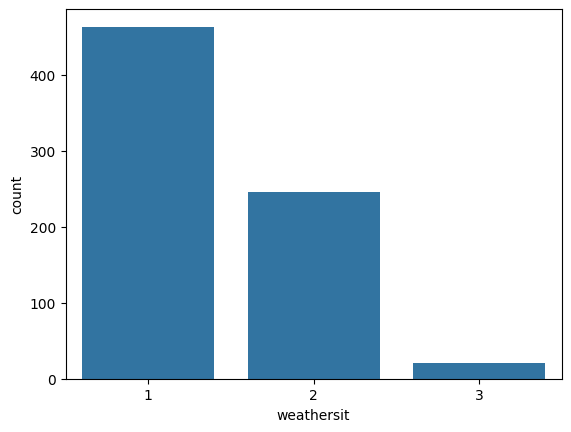

In [11]:
for i in cat_cols:
  sns.countplot(x=df_raw[i])
  plt.show()

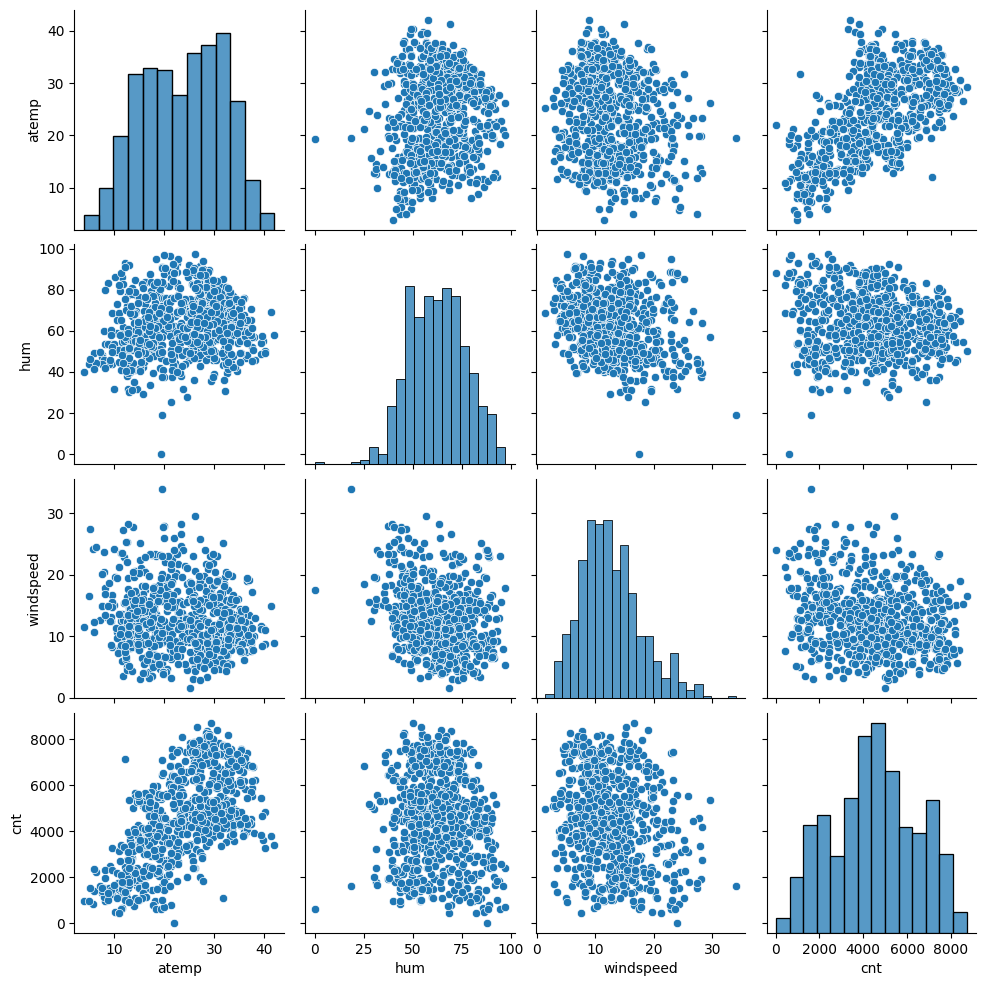

In [12]:
sns.pairplot(df_raw[num_cols])
plt.show()

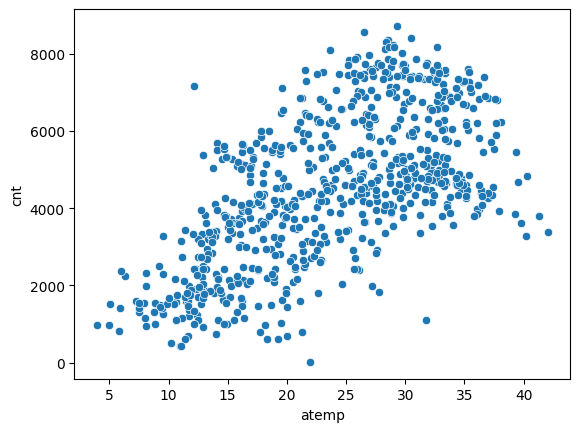

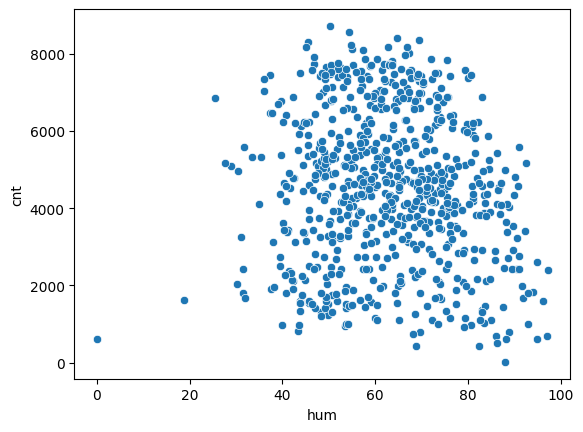

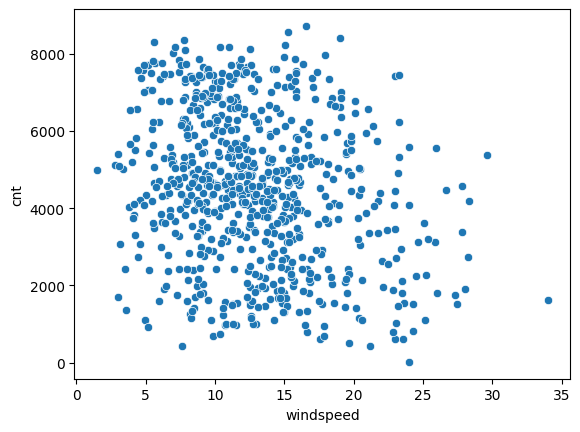

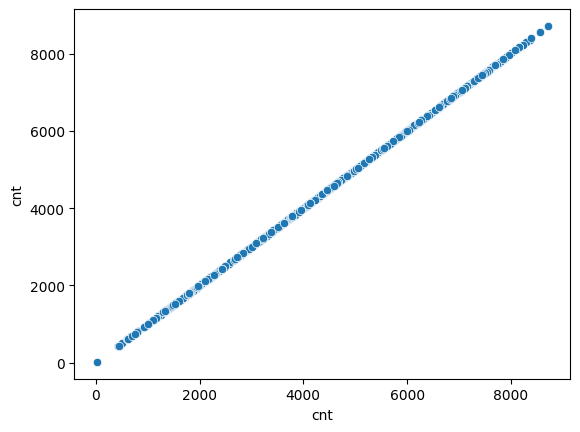

In [13]:
for i in num_cols:
  sns.scatterplot(x=df_raw[i],y=df_raw.cnt)
  plt.show()

## Atemp  has a great corellation when compared to other numerical values

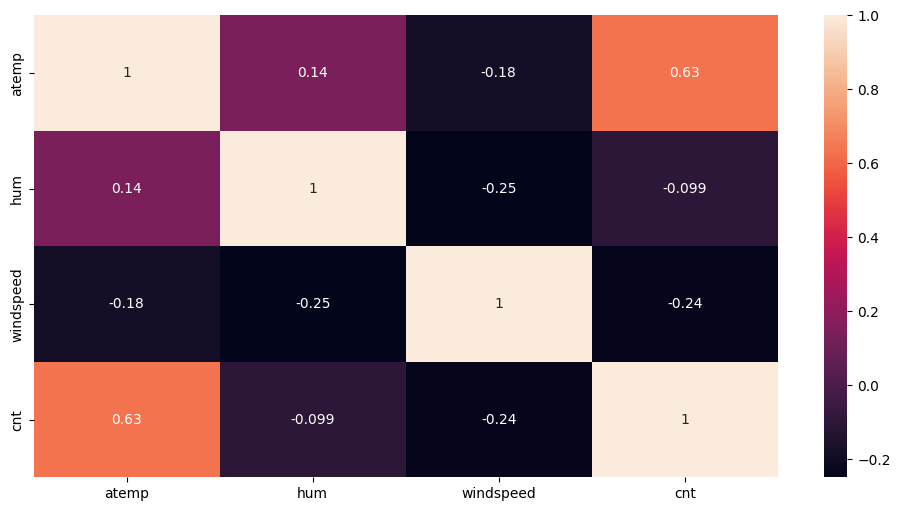

In [14]:
plt.figure(figsize=(12,6))
sns.heatmap(df_raw[num_cols].corr(), annot=True)
plt.show()

###Step 2 - Preparing the data for data modelling

- Encoding :
   -  Binary variable should be set to 1/0
   -  Category values to dummy var


In [10]:
## cat columnt check the  unique data
df_raw[cat_cols].nunique()

season         4
yr             2
mnth          12
holiday        2
weekday        7
workingday     2
weathersit     3
dtype: int64

In [12]:
day_mapping = {1: 'Wed', 2: 'Thurs', 3: 'Fri', 4: 'Sat', 5: 'Sun', 6: 'Mon', 0: 'Tues'}
df_raw['weekday'] = df_raw['weekday'].map(day_mapping)

In [13]:
mnth_mapping = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
df_raw['mnth'] = df_raw['mnth'].map(mnth_mapping)

In [14]:
ws_mapping = {1: 'Clear', 2: 'Mist', 3: 'Snow'}
df_raw['weathersit'] = df_raw['weathersit'].map(ws_mapping)

In [20]:
sea_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall',4:'Winter'}
df_raw['season'] = df_raw['season'].map(sea_mapping)

In [21]:
df_raw.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,0,Jan,0,Mon,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,0,Jan,0,Tues,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,0,Jan,0,Thurs,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [22]:
##dum = pd.get_dummies(df.RAD,drop_first=True, dtype=int)
df_raw[cat_cols].columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit'],
      dtype='object')

##Preprocessing step. as Cat columns has more  than one value
## create dummy variables

- drop:
  - dummy variable using the drop_first= True option

In [23]:
dum = pd.get_dummies(df_raw[cat_cols],drop_first=True, dtype=int)

In [24]:
dum

,yr,holiday,workingday,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Mist,weathersit_Snow
0,0,0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
2,0,0,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,1,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
726,1,0,1,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
727,1,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
728,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [25]:
df_wd = pd.concat([df_raw[num_cols], dum],axis=1)

In [26]:
df_wd.columns

Index(['atemp', 'hum', 'windspeed', 'cnt', 'yr', 'holiday', 'workingday',
       'season_Spring', 'season_Summer', 'season_Winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thurs', 'weekday_Tues',
       'weekday_Wed', 'weathersit_Mist', 'weathersit_Snow'],
      dtype='object')

## Step 3
 SPLIT  DATA  - 80/20.    TRAINING   / TEST

In [27]:
##  X= feature variables.  , y = target vairable

X = df_wd.drop('cnt',axis=1)
y = df_wd['cnt']

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=100)

In [30]:
X_train.head(2)

,atemp,hum,windspeed,yr,holiday,workingday,season_Spring,season_Summer,season_Winter,mnth_Aug,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Mist,weathersit_Snow
367,6.31375,44.1250,24.499957,1,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
648,21.55835,46.3333,12.166932,1,0,1,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0


## Step 4
 after  creating the training / test set we need to do the scaler as to have uniform scale of measurement

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


## Training set is  scalled to Fit_transform
Test set is only transformed

In [32]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##  create new Data frame for traing set

In [33]:
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df = pd.DataFrame(X_test, columns= X.columns)

In [34]:
X_train_df.head(2)

,atemp,hum,windspeed,yr,holiday,workingday,season_Spring,season_Summer,season_Winter,mnth_Aug,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Mist,weathersit_Snow
0,-2.133573,-1.351866,2.236778,0.972968,-0.167836,0.705291,1.724178,-0.572078,-0.577350,-0.31593,...,-0.319197,-0.295843,-0.421212,-0.395519,-0.375,2.546994,-0.426833,-0.41839,-0.721688,-0.167836
1,-0.241154,-1.193941,-0.119144,0.972968,-0.167836,0.705291,-0.579987,-0.572078,1.732051,-0.31593,...,3.132860,-0.295843,-0.421212,2.528321,-0.375,-0.392620,-0.426833,-0.41839,-0.721688,-0.167836


## Step 5 FEATURE SELECTION USING RFE

In [50]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [65]:
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=20)

In [66]:
selector = selector.fit(X_train_df, y_train)
selector.support_
select_features = X_train_df.columns[selector.support_]
#selector.ranking_

In [67]:
select_features

Index(['atemp', 'hum', 'windspeed', 'yr', 'holiday', 'season_Spring',
       'season_Summer', 'season_Winter', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb',
       'mnth_Jan', 'mnth_Jun', 'mnth_May', 'mnth_Nov', 'mnth_Sep',
       'weekday_Mon', 'weekday_Tues', 'weathersit_Mist', 'weathersit_Snow'],
      dtype='object')

In [68]:
X_train = X_train_df[select_features]
X_test = X_test_df[select_features]

## Model STAGE check for  R , P an VIF values  before
accepting the models


In [40]:
import  statsmodels.api as sm

In [69]:
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

In [70]:
y_train = y_train.reset_index(drop=True)
X_train_sm = X_train_sm.reset_index(drop=True)

In [71]:
model1 = sm.OLS(y_train, X_train_sm)
res1 = model1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     165.8
Date:                Mon, 24 Jun 2024   Prob (F-statistic):          9.74e-221
Time:                        14:17:40   Log-Likelihood:                -4691.3
No. Observations:                 584   AIC:                             9425.
Df Residuals:                     563   BIC:                             9516.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4505.2671     31.421    143.384      0.000    4443.550    4566.984
atemp             758.5966     69.809     10.867      0.000     621.478     895.715
hum              -175.3539     44.898     -3.906      0.000    -263.541     -87.166
windspeed        -239.7872     34.695     -6.911      0.000    -307.934    -171.640
yr               1002.7455     32.076     31.262      0.000     939.743    1065.749
holiday          -131.0904     32.150     -4.078      0.000    -194.238     -67.942
season_Spring    -196.6957     78.606     -2.502      0.013    -351.092     -42.299
season_Summer     151.4668     63.513      2.385      0.017      26.716     276.218
season_Winter     448.7631     62.015      7.236      0.000     326.955     570.572
mnth_Aug          121.2720     41.366      2.932      0.004      40.022     202.522
mnth_Dec         -165.3420     40.654     -4.067      0.000    -245.195     -85.489
mnth_Feb          -93.9653     43.774     -2.147      0.032    -179.946      -7.985
mnth_Jan         -182.2286     48.583     -3.751      0.000    -277.654     -86.803
mnth_Jun           79.9230     38.361      2.083      0.038       4.576     155.270
mnth_May           79.6168     41.788      1.905      0.057      -2.463     161.697
mnth_Nov         -155.7030     41.468     -3.755      0.000    -237.154     -74.252
mnth_Sep          219.4551     37.666      5.826      0.000     145.472     293.438
weekday_Mon        27.5317     32.214      0.855      0.393     -35.743      90.806
weekday_Tues     -162.7002     32.251     -5.045      0.000    -226.047     -99.354
weathersit_Mist  -247.0146     39.915     -6.188      0.000    -325.416    -168.613
weathersit_Snow  -366.0707     35.534    -10.302      0.000    -435.865    -296.276
==============================================================================
Omnibus:                      105.974   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              338.035
Skew:                          -0.845   Prob(JB):                     3.95e-74
Kurtosis:                       6.322   Cond. No.                         6.30
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data['Feature'] = X_train_sm.columns
vif_data['VIF'] = [ variance_inflation_factor(X_train_sm.values,i)
                    for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,1.000000
1,atemp,4.936124
2,hum,2.041781
3,windspeed,1.219243
4,yr,1.042117
5,holiday,1.046917
6,season_Spring,6.258507
7,season_Summer,4.085859
8,season_Winter,3.895383
9,mnth_Aug,1.733177


### Season_spring  has a higher VIF value > 5  this should be dropped

In [73]:
X_train_sm =  X_train_sm.drop('season_Spring',axis=1)

In [75]:
model2 = sm.OLS(np.array(y_train), X_train_sm)
res1 = model2.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     172.6
Date:                Mon, 24 Jun 2024   Prob (F-statistic):          1.62e-220
Time:                        14:43:34   Log-Likelihood:                -4694.5
No. Observations:                 584   AIC:                             9429.
Df Residuals:                     564   BIC:                             9516.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4505.2671     31.567    142.720      0.000    4443.263    4567.271
atemp             856.8943     57.976     14.780      0.000     743.018     970.770
hum              -185.8375     44.910     -4.138      0.000    -274.049     -97.626
windspeed        -246.4748     34.753     -7.092      0.000    -314.735    -178.214
yr                997.8490     32.165     31.023      0.000     934.671    1061.027
holiday          -132.9214     32.291     -4.116      0.000    -196.346     -69.496
season_Summer     249.5737     50.200      4.972      0.000     150.972     348.175
season_Winter     551.4808     46.701     11.809      0.000     459.752     643.209
mnth_Aug          157.9372     38.864      4.064      0.000      81.602     234.273
mnth_Dec         -162.7292     40.830     -3.986      0.000    -242.927     -82.531
mnth_Feb         -123.8424     42.310     -2.927      0.004    -206.947     -40.737
mnth_Jan         -203.4710     48.058     -4.234      0.000    -297.866    -109.076
mnth_Jun           75.0547     38.490      1.950      0.052      -0.546     150.655
mnth_May           66.8782     41.670      1.605      0.109     -14.969     148.726
mnth_Nov         -139.7218     41.164     -3.394      0.001    -220.575     -58.868
mnth_Sep          248.6872     35.975      6.913      0.000     178.025     319.349
weekday_Mon        28.3591     32.362      0.876      0.381     -35.206      91.925
weekday_Tues     -161.8353     32.399     -4.995      0.000    -225.473     -98.198
weathersit_Mist  -242.5550     40.061     -6.055      0.000    -321.242    -163.868
weathersit_Snow  -359.0631     35.588    -10.089      0.000    -428.964    -289.162
==============================================================================
Omnibus:                       94.639   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              277.387
Skew:                          -0.781   Prob(JB):                     5.84e-61
Kurtosis:                       5.993   Cond. No.                         4.23
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data['Feature'] = X_train_sm.columns
vif_data['VIF'] = [ variance_inflation_factor(X_train_sm.values,i)
                    for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,1.000000
1,atemp,3.373093
2,hum,2.024002
3,windspeed,1.212009
4,yr,1.038239
5,holiday,1.046375
6,season_Summer,2.528887
7,season_Winter,2.188628
8,mnth_Aug,1.515712
9,mnth_Dec,1.672977


### weekday_Mon has  high p value > 0.05.

In [77]:
X_train_sm =  X_train_sm.drop('weekday_Mon',axis=1)

In [78]:
model3 = sm.OLS(np.array(y_train), X_train_sm)
res3 = model3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     182.2
Date:                Mon, 24 Jun 2024   Prob (F-statistic):          1.73e-221
Time:                        14:46:57   Log-Likelihood:                -4694.9
No. Observations:                 584   AIC:                             9428.
Df Residuals:                     565   BIC:                             9511.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4505.2671     31.561    142.749      0.000    4443.276    4567.258
atemp             856.0880     57.957     14.771      0.000     742.250     969.926
hum              -186.7401     44.889     -4.160      0.000    -274.910     -98.571
windspeed        -245.2719     34.719     -7.065      0.000    -313.465    -177.079
yr                996.6263     32.128     31.020      0.000     933.521    1059.732
holiday          -135.3678     32.163     -4.209      0.000    -198.542     -72.193
season_Summer     249.1363     50.187      4.964      0.000     150.561     347.712
season_Winter     551.5391     46.691     11.813      0.000     459.830     643.248
mnth_Aug          158.0855     38.855      4.069      0.000      81.767     234.404
mnth_Dec         -162.3519     40.820     -3.977      0.000    -242.528     -82.175
mnth_Feb         -124.4234     42.296     -2.942      0.003    -207.501     -41.346
mnth_Jan         -203.7127     48.047     -4.240      0.000    -298.086    -109.339
mnth_Jun           75.9401     38.468      1.974      0.049       0.382     151.498
mnth_May           65.9925     41.649      1.584      0.114     -15.814     147.799
mnth_Nov         -140.1720     41.152     -3.406      0.001    -221.002     -59.342
mnth_Sep          249.3874     35.959      6.935      0.000     178.758     320.017
weekday_Tues     -167.0851     31.834     -5.249      0.000    -229.612    -104.558
weathersit_Mist  -242.3513     40.052     -6.051      0.000    -321.021    -163.682
weathersit_Snow  -358.8982     35.580    -10.087      0.000    -428.784    -289.013
==============================================================================
Omnibus:                       91.841   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              274.091
Skew:                          -0.752   Prob(JB):                     3.03e-60
Kurtosis:                       6.000   Cond. No.                         4.23
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data['Feature'] = X_train_sm.columns
vif_data['VIF'] = [ variance_inflation_factor(X_train_sm.values,i)
                    for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,1.000000
1,atemp,3.372243
2,hum,2.022937
3,windspeed,1.210118
4,yr,1.036285
5,holiday,1.038554
6,season_Summer,2.528637
7,season_Winter,2.188624
8,mnth_Aug,1.515683
9,mnth_Dec,1.672791


### mnth_May has high p value > 0.05.

In [80]:
X_train_sm =  X_train_sm.drop('mnth_May',axis=1)

In [81]:
model4 = sm.OLS(np.array(y_train), X_train_sm)
res4 = model4.fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     192.3
Date:                Mon, 24 Jun 2024   Prob (F-statistic):          4.27e-222
Time:                        14:48:58   Log-Likelihood:                -4696.2
No. Observations:                 584   AIC:                             9428.
Df Residuals:                     566   BIC:                             9507.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4505.2671     31.603    142.559      0.000    4443.194    4567.340
atemp             877.8662     56.379     15.571      0.000     767.129     988.603
hum              -179.4703     44.713     -4.014      0.000    -267.295     -91.646
windspeed        -248.1416     34.717     -7.147      0.000    -316.332    -179.951
yr                993.8407     32.123     30.939      0.000     930.746    1056.935
holiday          -136.9407     32.191     -4.254      0.000    -200.169     -73.712
season_Summer     289.3170     43.367      6.671      0.000     204.138     374.496
season_Winter     549.5864     46.737     11.759      0.000     457.787     641.385
mnth_Aug          150.1073     38.579      3.891      0.000      74.331     225.883
mnth_Dec         -156.8842     40.728     -3.852      0.000    -236.880     -76.888
mnth_Feb         -117.4757     42.125     -2.789      0.005    -200.215     -34.736
mnth_Jan         -194.3037     47.743     -4.070      0.000    -288.078    -100.529
mnth_Jun           53.4951     35.813      1.494      0.136     -16.847     123.838
mnth_Nov         -135.4340     41.098     -3.295      0.001    -216.158     -54.710
mnth_Sep          244.0660     35.850      6.808      0.000     173.652     314.480
weekday_Tues     -167.9293     31.872     -5.269      0.000    -230.531    -105.328
weathersit_Mist  -244.2352     40.088     -6.092      0.000    -322.975    -165.496
weathersit_Snow  -361.9808     35.574    -10.175      0.000    -431.854    -292.107
==============================================================================
Omnibus:                       89.617   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              252.342
Skew:                          -0.753   Prob(JB):                     1.60e-55
Kurtosis:                       5.847   Cond. No.                         3.92
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data['Feature'] = X_train_sm.columns
vif_data['VIF'] = [ variance_inflation_factor(X_train_sm.values,i)
                    for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,1.000000
1,atemp,3.182582
2,hum,2.001803
3,windspeed,1.206825
4,yr,1.033182
5,holiday,1.037564
6,season_Summer,1.883033
7,season_Winter,2.187099
8,mnth_Aug,1.490230
9,mnth_Dec,1.660836


### mnth_Jun has higher P Value > 0.05

In [83]:
X_train_sm =  X_train_sm.drop('mnth_Jun',axis=1)

In [87]:
model5 = sm.OLS(np.array(y_train), X_train_sm)
res5 = model5.fit()
print(res5.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     203.7
Date:                Mon, 24 Jun 2024   Prob (F-statistic):          8.92e-223
Time:                        14:56:23   Log-Likelihood:                -4697.4
No. Observations:                 584   AIC:                             9429.
Df Residuals:                     567   BIC:                             9503.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4505.2671     31.637    1

In [88]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data['Feature'] = X_train_sm.columns
vif_data['VIF'] = [ variance_inflation_factor(X_train_sm.values,i)
                    for i in range(len(X_train_sm.columns))]
print(vif_data)

            Feature       VIF
0             const  1.000000
1             atemp  2.861170
2               hum  1.956514
3         windspeed  1.203080
4                yr  1.031610
5           holiday  1.036528
6     season_Summer  1.836048
7     season_Winter  2.183467
8          mnth_Aug  1.434265
9          mnth_Dec  1.647996
10         mnth_Feb  1.769692
11         mnth_Jan  2.257088
12         mnth_Nov  1.685612
13         mnth_Sep  1.267941
14     weekday_Tues  1.016510
15  weathersit_Mist  1.605652
16  weathersit_Snow  1.264527


## Modeling  steps are completed as the VIF and P values are  within the considerable limits  VIF < 5 and P < 0.05


## Step 6.  Residual Analysis

In [89]:
y_train_pred = res5.predict(X_train_sm)

### y_train - y_train_pred

<ipython-input-92-30a779b80b4b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res)


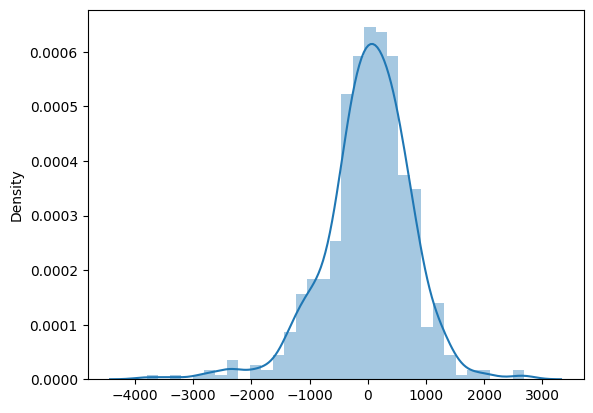

In [92]:
res = y_train - y_train_pred
sns.distplot(res)
plt.show()

## Step 7 - Prediction and Evaluation

In [103]:
X_test_sm.head(2)

,const,atemp,hum,windspeed,yr,holiday,season_Spring,season_Summer,season_Winter,mnth_Aug,...,mnth_Feb,mnth_Jan,mnth_Jun,mnth_May,mnth_Nov,mnth_Sep,weekday_Mon,weekday_Tues,weathersit_Mist,weathersit_Snow
0,1.0,1.21280,0.054583,-1.400510,-1.027783,5.958188,-0.579987,-0.572078,-0.57735,-0.31593,...,-0.281926,-0.30933,-0.288943,-0.30933,-0.295843,-0.295843,-0.421212,-0.426833,1.385641,-0.167836
1,1.0,1.55764,-0.273196,-0.986692,0.972968,-0.167836,-0.579987,1.748015,-0.57735,-0.31593,...,-0.281926,-0.30933,3.460893,-0.30933,-0.295843,-0.295843,-0.421212,-0.426833,-0.721688,-0.167836


### Match the columns of Both X_train_sm and X_test_sm

In [98]:
X_test_sm2 = X_test_sm[X_train_sm.columns]

In [99]:
X_test_sm2.shape

(146, 17)

##Prediction

In [100]:
y_test_pred = res5.predict(X_test_sm2)

In [102]:
r2_score(y_true=y_test, y_pred=y_test_pred)

0.7809611376763437